#  Feature Engineering for Predictive Maintenance

## Description:
In the Predictive Maintenance with Supervised Learning project, the Feature Engineering notebook (02_feature_engineering.ipynb) plays a crucial role in preparing the data for model training and improving the predictive performance of the machine learning models. Feature engineering involves creating new features, transforming existing ones, or selecting subsets of features to enhance the model's ability to capture patterns and make accurate predictions.

## Objective:
The primary objective of this notebook is to engineer informative and predictive features from the raw data collected from industrial machines. By crafting meaningful features, we aim to improve the model's ability to detect machine failures and predict their occurrence, thereby enabling proactive maintenance strategies.

### Data Loading

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv(r"C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data\new_dataframe.csv")


In [5]:
encoded_data = pd.read_csv(r"C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data\encoded_data.csv")


### Feature Creation:

- Create new features based on domain knowledge and insights gained from the EDA.


In [8]:
feat_df = encoded_data.copy()

In [9]:
# Create new feature: Product of Air temperature and Process temperature
feat_df['temp_product'] = feat_df['Air temperature [K]'] * feat_df['Process temperature [K]']

# Create new feature: Difference between Air temperature and Process temperature
feat_df['temp_difference'] = feat_df['Air temperature [K]'] - feat_df['Process temperature [K]']

# Create new feature: Product of Rotational speed and Torque (Power output)
feat_df['power_output'] = feat_df['Rotational speed [rpm]'] * feat_df['Torque [Nm]']


In [10]:
feat_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure Type,Type_H,Type_L,Type_M,temp_product,temp_difference,power_output
0,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,1,91993.66,-10.5,66382.8
1,298.2,308.7,1408.0,46.3,3.0,0,0,0,1,0,92054.34,-10.5,65190.4
2,298.1,308.5,1498.0,49.4,5.0,0,0,0,1,0,91963.85,-10.4,74001.2
3,298.2,308.6,1433.0,39.5,7.0,0,0,0,1,0,92024.52,-10.4,56603.5
4,298.2,308.7,1408.0,40.0,9.0,0,0,0,1,0,92054.34,-10.5,56320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,298.8,308.4,1604.0,29.5,14.0,0,0,0,0,1,92149.92,-9.6,47318.0
9969,298.9,308.4,1632.0,31.8,17.0,0,0,1,0,0,92180.76,-9.5,51897.6
9970,299.0,308.6,1645.0,33.4,22.0,0,0,0,0,1,92271.40,-9.6,54943.0
9971,299.0,308.7,1408.0,48.5,25.0,0,0,1,0,0,92301.30,-9.7,68288.0


In [11]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...
9968,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9969,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9970,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9971,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [14]:
# Initialize StandardScaler
scaler = StandardScaler()

# Define numerical features to be scaled
numerical_features = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','temp_product','temp_difference','power_output']

# Apply StandardScaler to the numerical features
feat_df[numerical_features] = scaler.fit_transform(feat_df[numerical_features])

### Feature Importance

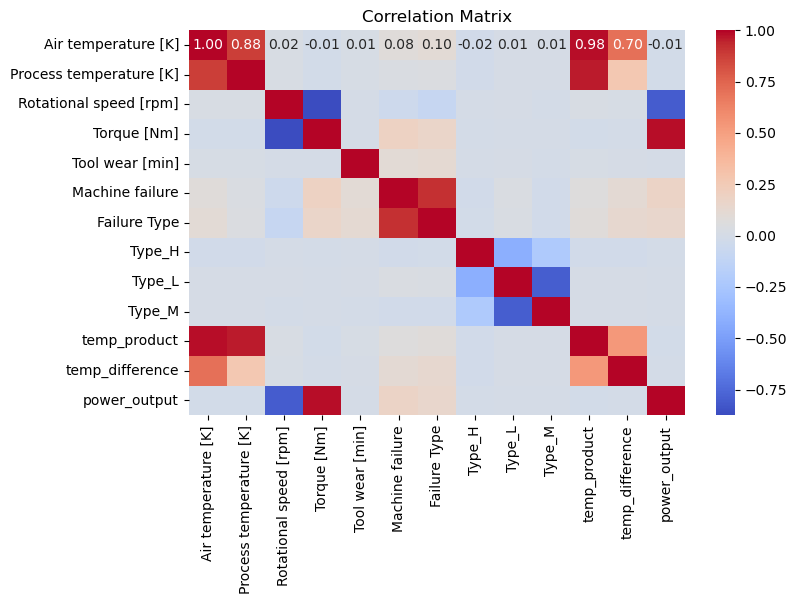

In [17]:
# Correlation Analysis
correlation_matrix = feat_df.corr()

# Plotting the correlation matrix as a heatmap with adjusted font size
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Obeseravtion of the correlation of nre features and other variables and target

- The power_output column is highly postively correlated to Torque and high negatively correlated to rotational speed. It is also positively correlated to

both targets.
- The temp_difference column is  postively correlated to air temprature and postively correlated to process temprature. It is also positively correlated to both targets.

- The temp_product column is highly postively correlated to air temprature and highly postively correlated to process temprature. It is also positively correlated to both targets.

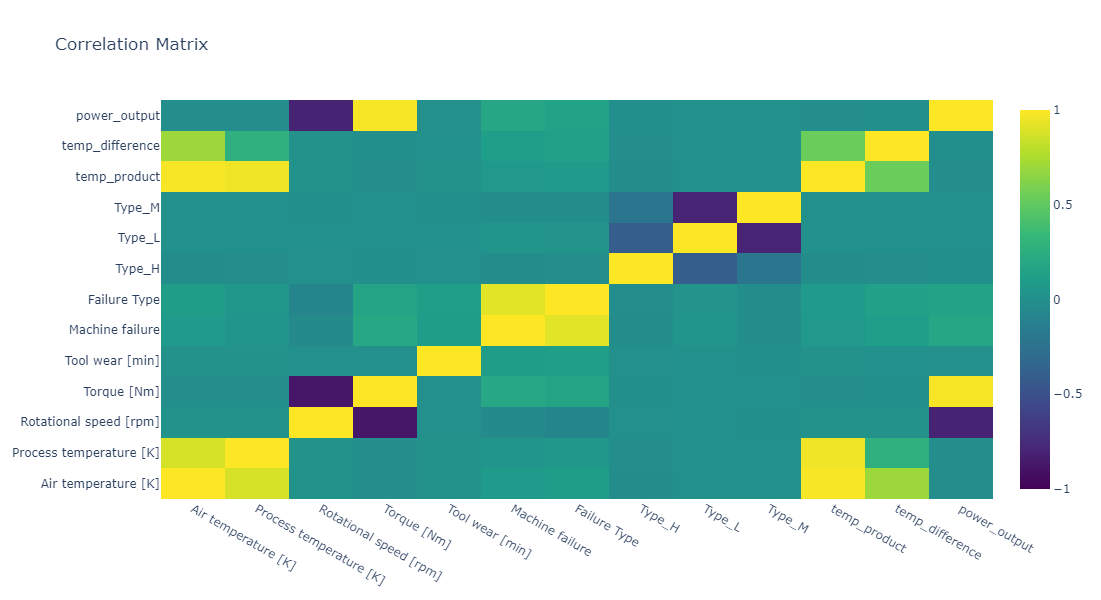

In [19]:
import plotly.graph_objects as go
import pandas as pd

# Compute correlation matrix from your DataFrame
correlation_matrix = feat_df.corr()

# Create heatmap using Plotly
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                 x=correlation_matrix.columns,
                                 y=correlation_matrix.index,
                                 colorscale='Viridis',
                                 zmin=-1, zmax=1,
                                 text=correlation_matrix.round(2).values))
fig.update_layout(title='Correlation Matrix', height=600, width=800)
fig.show()